In [36]:
import torch 
import numpy as np
import pandas as pd 
from tqdm import tqdm
from torchsummary import summary
from matplotlib import pyplot as plt

# EDA

In [20]:
df = pd.read_csv('data/moore.csv', header=None)
df

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100
...,...,...
157,2017,18000000000
158,2017,19200000000
159,2018,8876000000
160,2018,23600000000


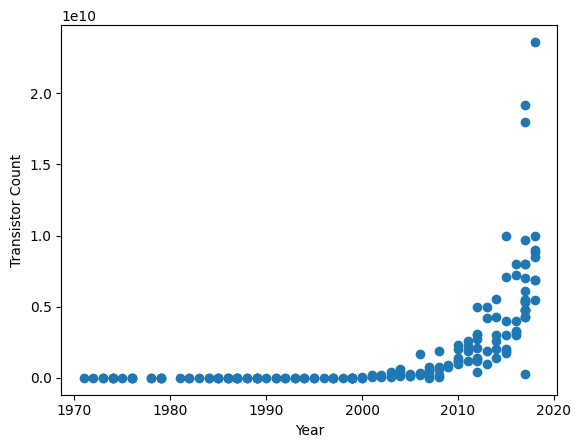

In [21]:
year = df.values[:, 0]
transistor_count = df.values[:, 1]

plt.scatter(year, transistor_count)
plt.xlabel("Year")
plt.ylabel("Transistor Count")
plt.show()

#### Relationsip is **Not Linear**

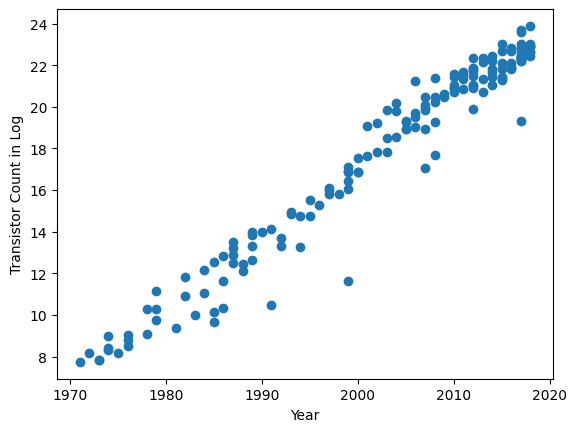

In [22]:
transistor_count_log = np.log(transistor_count)
plt.scatter(year, transistor_count_log)
plt.xlabel("Year")
plt.ylabel("Transistor Count in Log")
plt.show()

#### Relationsip is **Linear**

# Data Preprocessing

In [23]:
X = torch.tensor(year, dtype=torch.float32)
Y = torch.tensor(transistor_count_log, dtype=torch.float32)

In [24]:
#Normalize Data
mx = torch.mean(X)
my = torch.mean(Y)

sx = torch.std(X)
sy = torch.std(Y)

X = (X - mx) / sx
Y = (Y - my) / sy

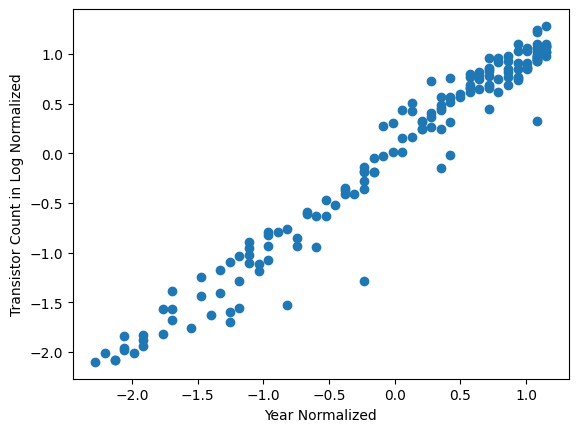

In [25]:
transistor_count_log = np.log(transistor_count)
plt.scatter(X.numpy(), Y.numpy())
plt.xlabel("Year Normalized")
plt.ylabel("Transistor Count in Log Normalized")
plt.show()

# Model Building

In [35]:
model = torch.nn.Sequential(torch.nn.Linear(1, 1))
optimizer = torch.optim.SGD(
                        model.parameters(),
                        lr=0.01,
                        momentum=0.7
                        )
criterion = torch.nn.MSELoss()

In [38]:
Y = Y.reshape(-1,1)
X = X.reshape(-1,1)

# Model Training

In [39]:
n_epoches = 1000
loss_all = []
for epoch in tqdm(range(n_epoches)):
    optimizer.zero_grad()

    P = model(X)
    loss = criterion(P, Y)

    loss_all.append(loss.item())

    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch}/{n_epoches},  Loss: {round(loss.item(), 4)}")

 16%|█▌        | 159/1000 [00:00<00:00, 1589.23it/s]

Epoch 0/1000,  Loss: 2.3387
Epoch 1/1000,  Loss: 2.2481
Epoch 2/1000,  Loss: 2.1
Epoch 3/1000,  Loss: 1.9203
Epoch 4/1000,  Loss: 1.7277
Epoch 5/1000,  Loss: 1.5351
Epoch 6/1000,  Loss: 1.3509
Epoch 7/1000,  Loss: 1.18
Epoch 8/1000,  Loss: 1.0248
Epoch 9/1000,  Loss: 0.8861
Epoch 10/1000,  Loss: 0.7638
Epoch 11/1000,  Loss: 0.6569
Epoch 12/1000,  Loss: 0.5642
Epoch 13/1000,  Loss: 0.4843
Epoch 14/1000,  Loss: 0.4158
Epoch 15/1000,  Loss: 0.3573
Epoch 16/1000,  Loss: 0.3075
Epoch 17/1000,  Loss: 0.2652
Epoch 18/1000,  Loss: 0.2294
Epoch 19/1000,  Loss: 0.1991
Epoch 20/1000,  Loss: 0.1735
Epoch 21/1000,  Loss: 0.1519
Epoch 22/1000,  Loss: 0.1337
Epoch 23/1000,  Loss: 0.1184
Epoch 24/1000,  Loss: 0.1056
Epoch 25/1000,  Loss: 0.0948
Epoch 26/1000,  Loss: 0.0857
Epoch 27/1000,  Loss: 0.078
Epoch 28/1000,  Loss: 0.0716
Epoch 29/1000,  Loss: 0.0662
Epoch 30/1000,  Loss: 0.0617
Epoch 31/1000,  Loss: 0.0579
Epoch 32/1000,  Loss: 0.0548
Epoch 33/1000,  Loss: 0.0521
Epoch 34/1000,  Loss: 0.0498
E

 49%|████▉     | 493/1000 [00:00<00:00, 1646.60it/s]

Epoch 316/1000,  Loss: 0.0382
Epoch 317/1000,  Loss: 0.0382
Epoch 318/1000,  Loss: 0.0382
Epoch 319/1000,  Loss: 0.0382
Epoch 320/1000,  Loss: 0.0382
Epoch 321/1000,  Loss: 0.0382
Epoch 322/1000,  Loss: 0.0382
Epoch 323/1000,  Loss: 0.0382
Epoch 324/1000,  Loss: 0.0382
Epoch 325/1000,  Loss: 0.0382
Epoch 326/1000,  Loss: 0.0382
Epoch 327/1000,  Loss: 0.0382
Epoch 328/1000,  Loss: 0.0382
Epoch 329/1000,  Loss: 0.0382
Epoch 330/1000,  Loss: 0.0382
Epoch 331/1000,  Loss: 0.0382
Epoch 332/1000,  Loss: 0.0382
Epoch 333/1000,  Loss: 0.0382
Epoch 334/1000,  Loss: 0.0382
Epoch 335/1000,  Loss: 0.0382
Epoch 336/1000,  Loss: 0.0382
Epoch 337/1000,  Loss: 0.0382
Epoch 338/1000,  Loss: 0.0382
Epoch 339/1000,  Loss: 0.0382
Epoch 340/1000,  Loss: 0.0382
Epoch 341/1000,  Loss: 0.0382
Epoch 342/1000,  Loss: 0.0382
Epoch 343/1000,  Loss: 0.0382
Epoch 344/1000,  Loss: 0.0382
Epoch 345/1000,  Loss: 0.0382
Epoch 346/1000,  Loss: 0.0382
Epoch 347/1000,  Loss: 0.0382
Epoch 348/1000,  Loss: 0.0382
Epoch 349/

100%|██████████| 1000/1000 [00:00<00:00, 1649.40it/s]

Epoch 657/1000,  Loss: 0.0382
Epoch 658/1000,  Loss: 0.0382
Epoch 659/1000,  Loss: 0.0382
Epoch 660/1000,  Loss: 0.0382
Epoch 661/1000,  Loss: 0.0382
Epoch 662/1000,  Loss: 0.0382
Epoch 663/1000,  Loss: 0.0382
Epoch 664/1000,  Loss: 0.0382
Epoch 665/1000,  Loss: 0.0382
Epoch 666/1000,  Loss: 0.0382
Epoch 667/1000,  Loss: 0.0382
Epoch 668/1000,  Loss: 0.0382
Epoch 669/1000,  Loss: 0.0382
Epoch 670/1000,  Loss: 0.0382
Epoch 671/1000,  Loss: 0.0382
Epoch 672/1000,  Loss: 0.0382
Epoch 673/1000,  Loss: 0.0382
Epoch 674/1000,  Loss: 0.0382
Epoch 675/1000,  Loss: 0.0382
Epoch 676/1000,  Loss: 0.0382
Epoch 677/1000,  Loss: 0.0382
Epoch 678/1000,  Loss: 0.0382
Epoch 679/1000,  Loss: 0.0382
Epoch 680/1000,  Loss: 0.0382
Epoch 681/1000,  Loss: 0.0382
Epoch 682/1000,  Loss: 0.0382
Epoch 683/1000,  Loss: 0.0382
Epoch 684/1000,  Loss: 0.0382
Epoch 685/1000,  Loss: 0.0382
Epoch 686/1000,  Loss: 0.0382
Epoch 687/1000,  Loss: 0.0382
Epoch 688/1000,  Loss: 0.0382
Epoch 689/1000,  Loss: 0.0382
Epoch 690/

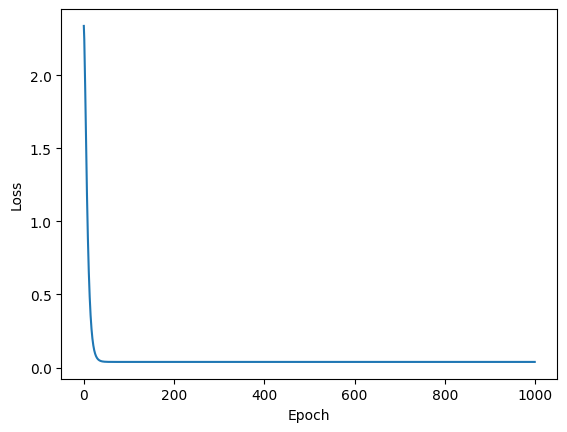

In [40]:
# plot loss
plt.plot(loss_all)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

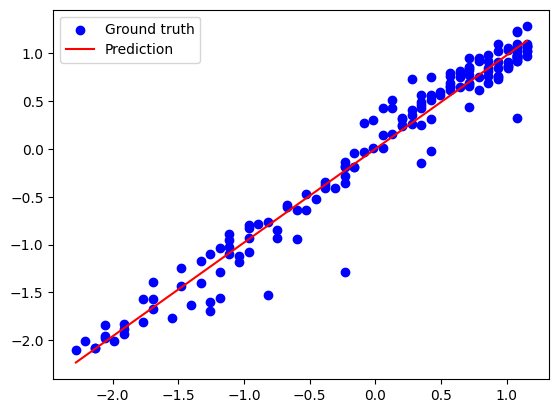

In [46]:
# Predition Plot
plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Ground truth')
plt.plot(X.numpy(), P.detach().numpy(), color='red', label='Prediction')
plt.legend()
plt.show()